# Ljung Box

Tests for the absence of serial autocorrleation up to a lag (k)

$H_{0}$: Residuals are independently distributed | Does not show a lack of fit | <ins> Model is good </ins> 

$H_{a}$: Residuals have serial correlation | Does show a lack of fit | <ins> Model is bad </ins> 

### lbvaluefloat or array
The Ljung-Box test statistic.

### pvaluefloat or array
The p-value based on chi-square distribution. The p-value is computed as 1.0 - chi2.cdf(lbvalue, dof) where dof is lag - model_df. If lag - model_df <= 0, then NaN is returned for the pvalue.

### bpvalue(optional), float or array
The test statistic for Box-Pierce test.

### bppvalue(optional), float or array
The p-value based for Box-Pierce test on chi-square distribution. The p-value is computed as 1.0 - chi2.cdf(bpvalue, dof) where dof is lag - model_df. If lag - model_df <= 0, then NaN is returned for the pvalue.

In [1]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
data = sm.datasets.sunspots.load_pandas().data


In [2]:
data['SUNACTIVITY'].head()

0     5.0
1    11.0
2    16.0
3    23.0
4    36.0
Name: SUNACTIVITY, dtype: float64

<AxesSubplot:>

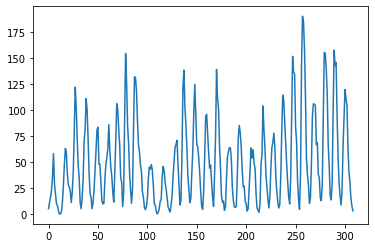

In [3]:
data["SUNACTIVITY"].plot()

In [4]:
res = sm.tsa.ARMA(data["SUNACTIVITY"], (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,214.106771,1.827568e-40,208.561478,2.635561e-39


<AxesSubplot:>

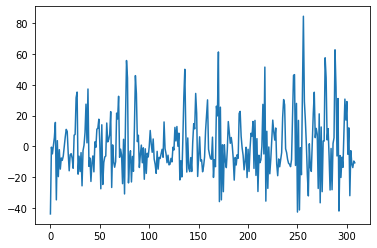

In [5]:
res.resid.plot()

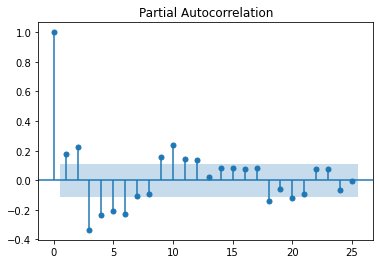

In [6]:
plot_pacf(res.resid)
plt.show()

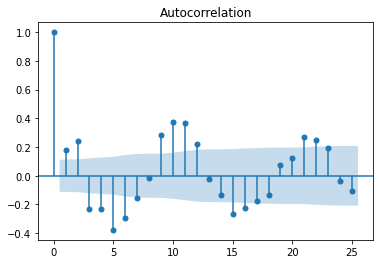

In [7]:
plot_acf(res.resid)
plt.show()

In [8]:
res = sm.tsa.ARMA(data["SUNACTIVITY"], (3,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,28.089313,0.001747,27.343197,0.002298


<AxesSubplot:>

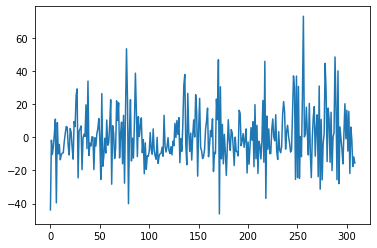

In [9]:
res.resid.plot()

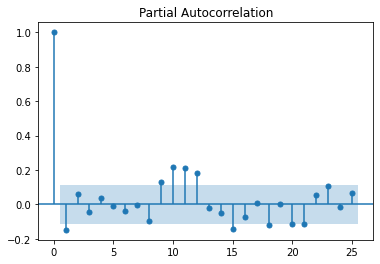

In [10]:
plot_pacf(res.resid)
plt.show()

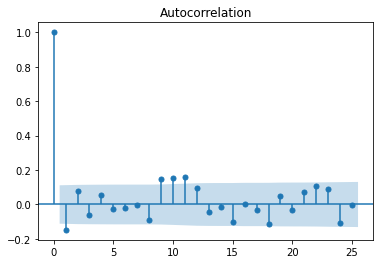

In [11]:
plot_acf(res.resid)
plt.show()

### There is some other seasonality happening. Quick glance online, sun spots have an 11 year cycle. Unsure the frequency of this dataset